In [11]:
from neural_network import *

from matplotlib import pyplot as plt

In [12]:
file_path = "../Data/01_Inicial_v8.xlsx"

D = Data_loader(file_path,seed=0)

In [13]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

In [14]:
# Set hyperparameters
n_epochs1 = 300
batch_size1 = 80
n_epochs2 = 300
batch_size2 = 80
n_epochs3 = 300
batch_size3 = 80

lr1 = 1e-3
lr2 = 1e-3
lr3 = 1e-3

scheduler_step1 = 100
scheduler_gamma1 = 0.9

scheduler_step2 = 100
scheduler_gamma2 = 0.9

scheduler_step3 = 100
scheduler_gamma3 = 0.9

layers1 = [50 for _ in range(4)]
layers2 = [50 for _ in range(4)]

dropout1 = 0.2
dropout2 = 0.2

In [15]:
# Pre-train the first network
NN.init_net1(layers=layers1, dropout=dropout1)

loss1_train_pre = []
loss1_val_pre = []

opt1 = torch.optim.Adam(NN.net1.parameters(),lr=lr1)
sch1 = torch.optim.lr_scheduler.StepLR(opt1, step_size=scheduler_step1, gamma=scheduler_gamma1)

for epoch in range(n_epochs1):

  NN.net1.train()
  opt1.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  for X1, Y1_target in D.get_batch1(batch_size=batch_size1):
    Y1_pred = NN.net1(X1)
    loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')
    loss.backward()
    opt1.step()

    loss_train_epoch += loss.item()

  NN.net1.eval()
  with torch.no_grad():
    for X1, Y1_target in D.get_batch1(batch_size=batch_size1,validation=True):
      Y1_pred = NN.net1(X1)
      loss = torch.nn.functional.mse_loss(Y1_target, Y1_pred, reduction='sum')

      loss_val_epoch += loss.item()

  loss_train_epoch = loss_train_epoch/(D.n_train*output_size1)
  loss_val_epoch = loss_val_epoch/(D.n_val*output_size1)

  loss1_train_pre.append(loss_train_epoch)
  loss1_val_pre.append(loss_val_epoch)

  sch1.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch}, Validation loss: {loss_val_epoch}')

Epoch: 0, Loss: 1.0030102192011094, Validation loss: 1.1566995649195428
Epoch: 10, Loss: 0.36576001088422044, Validation loss: 0.392460097127886
Epoch: 20, Loss: 0.12350360074437651, Validation loss: 0.07801585410957906
Epoch: 30, Loss: 0.11583379874552104, Validation loss: 0.054542861767669225
Epoch: 40, Loss: 0.08848202228546143, Validation loss: 0.046022927583153565
Epoch: 50, Loss: 0.07967685039778401, Validation loss: 0.030911609308043524
Epoch: 60, Loss: 0.07531528096450002, Validation loss: 0.035158043477072645
Epoch: 70, Loss: 0.07057943917754897, Validation loss: 0.0325877879982564
Epoch: 80, Loss: 0.07247276951495867, Validation loss: 0.03778609944813287
Epoch: 90, Loss: 0.07788425011742384, Validation loss: 0.02801607793836451
Epoch: 100, Loss: 0.0705234108114601, Validation loss: 0.025440230298398148
Epoch: 110, Loss: 0.06776421231434758, Validation loss: 0.03251402413667138
Epoch: 120, Loss: 0.06448833431516375, Validation loss: 0.030585619940686582
Epoch: 130, Loss: 0.065

In [16]:
# Train the second network
NN.init_net2(layers=layers2, dropout=dropout2)

loss1_train = []
loss1_val = []
loss2_train = []
loss2_val = []
loss_train = []
loss_val = []

opt2 = torch.optim.Adam(NN.net2.parameters(),lr=lr2)
sch2 = torch.optim.lr_scheduler.StepLR(opt2, step_size=scheduler_step2, gamma=scheduler_gamma2)

for epoch in range(n_epochs2):
  NN.train()
  opt2.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size2):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt2.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size2,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch2.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.5257118047669876 (0.04386296494062557 + 1.007560641266579), Validation loss: 0.6784777464690032 (0.023608613897252967 + 1.3333468967013888)
Epoch: 10, Loss: 0.3412617971730787 (0.051900128431098404 + 0.6306234492812046), Validation loss: 0.38368119133843315 (0.023608613897252967 + 0.7437537864402488)
Epoch: 20, Loss: 0.1608750542929006 (0.05621318484461585 + 0.26553691597872003), Validation loss: 0.07918904445789478 (0.023608613897252967 + 0.13476947501853662)
Epoch: 30, Loss: 0.10112448847571084 (0.04051330588584722 + 0.1617356677388036), Validation loss: 0.06457413567437066 (0.023608613897252967 + 0.10553965745148836)
Epoch: 40, Loss: 0.09423449982044309 (0.04883791901344477 + 0.1396310806274414), Validation loss: 0.049157138224001286 (0.023608613897252967 + 0.0747056625507496)
Epoch: 50, Loss: 0.08976266994032749 (0.04414623171784157 + 0.1353791081628134), Validation loss: 0.06394889619615343 (0.023608613897252967 + 0.1042891784950539)
Epoch: 60, Loss: 0.0842177657

In [17]:
# Fine-tune both networks
opt3 = torch.optim.Adam(NN.parameters(),lr=lr3)
sch3 = torch.optim.lr_scheduler.StepLR(opt3, step_size=scheduler_step3, gamma=scheduler_gamma3)

for epoch in range(n_epochs3):
  NN.train()
  opt3.zero_grad()

  loss_train_epoch = 0
  loss_val_epoch = 0

  loss1_train_epoch = 0
  loss1_val_epoch = 0

  loss2_train_epoch = 0
  loss2_val_epoch = 0

  for X, Y_target in D.get_batch2(batch_size=batch_size3):
    Y_pred = NN(X)
    loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
    loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
    loss = loss1 + loss2

    loss.backward()
    opt3.step()

    loss_train_epoch += loss.item()
    loss1_train_epoch += loss1.item()
    loss2_train_epoch += loss2.item()

  NN.eval()
  with torch.no_grad():
    for X, Y_target in D.get_batch2(batch_size=batch_size3,validation=True):
      Y_pred = NN(X)
      loss1 = torch.nn.functional.mse_loss(Y_target[:,:output_size1], Y_pred[:,:output_size1], reduction='sum')
      loss2 = torch.nn.functional.mse_loss(Y_target[:,output_size1:], Y_pred[:,output_size1:], reduction='sum')
      loss = loss1 + loss2

      loss_val_epoch += loss.item()
      loss1_val_epoch += loss1.item()
      loss2_val_epoch += loss2.item()

  loss1_train_epoch = loss1_train_epoch/(D.n_train2*output_size1)
  loss1_val_epoch = loss1_val_epoch/(D.n_val2*output_size1)
  loss2_train_epoch = loss2_train_epoch/(D.n_train2*output_size2)
  loss2_val_epoch = loss2_val_epoch/(D.n_val2*output_size2)
  loss_train_epoch = loss_train_epoch/(D.n_train2*(output_size1+output_size2))
  loss_val_epoch = loss_val_epoch/(D.n_val2*(output_size1+output_size2))

  loss1_train.append(loss1_train_epoch)
  loss1_val.append(loss1_val_epoch)
  loss2_train.append(loss2_train_epoch)
  loss2_val.append(loss2_val_epoch)
  loss_train.append(loss_train_epoch)
  loss_val.append(loss_val_epoch)

  sch3.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss_train_epoch} ({loss1_train_epoch} + {loss2_train_epoch}), Validation loss: {loss_val_epoch} ({loss1_val_epoch} + {loss2_val_epoch})')

Epoch: 0, Loss: 0.05223538820133653 (0.046698768748793494 + 0.057772009871726815), Validation loss: 0.038218533551251446 (0.03455844190385607 + 0.04187862519864683)
Epoch: 10, Loss: 0.050907060711882834 (0.04947130513745685 + 0.05234281406846157), Validation loss: 0.03947910556086787 (0.024034800352873625 + 0.054923410768862126)
Epoch: 20, Loss: 0.056871979735618416 (0.05143406335697618 + 0.062309895005337027), Validation loss: 0.03868635937019631 (0.027543131951932556 + 0.049829588996039495)
Epoch: 30, Loss: 0.05577670474385106 (0.051583589509476065 + 0.05996981886930244), Validation loss: 0.040025817023383245 (0.026403175459967718 + 0.05364846300195764)
Epoch: 40, Loss: 0.059519849821578624 (0.04656452689059945 + 0.07247517386148142), Validation loss: 0.061347149036548754 (0.02908526968072962 + 0.09360902397720902)
Epoch: 50, Loss: 0.04999290288880814 (0.04381912586300872 + 0.05616668102353118), Validation loss: 0.03295069932937622 (0.028440316518147785 + 0.03746108214060465)
Epoch: 

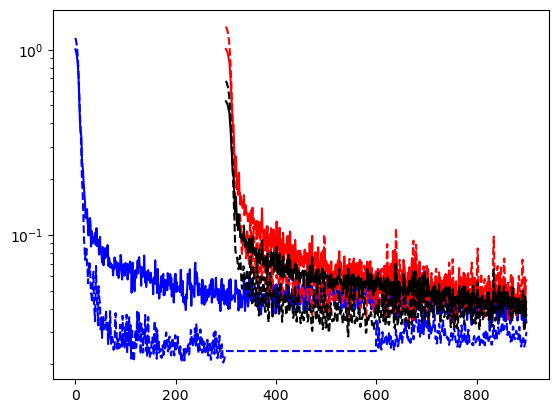

In [18]:
plt.figure()

epochs1 = range(len(loss1_train_pre))
epochs2 = range(len(loss1_train_pre),len(loss1_train_pre)+len(loss_train))

plt.plot(epochs1,loss1_train_pre,'b')
plt.plot(epochs1,loss1_val_pre,'b--')

plt.plot(epochs2,loss1_train,'b')
plt.plot(epochs2,loss1_val,'b--')

plt.plot(epochs2,loss2_train,'r')
plt.plot(epochs2,loss2_val,'r--')

plt.plot(epochs2,loss_train,'k')
plt.plot(epochs2,loss_val,'k--')

plt.yscale('log') 


In [19]:
NN.save('model.pt')